In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fittingGrids as fg


from matplotlib import cm
from scipy import stats
from math import atan, sin, cos
from scipy.signal import find_peaks

### Step 0. import points

In [2]:
points = np.genfromtxt("./soucefile/coords_demo2.csv", delimiter=",")

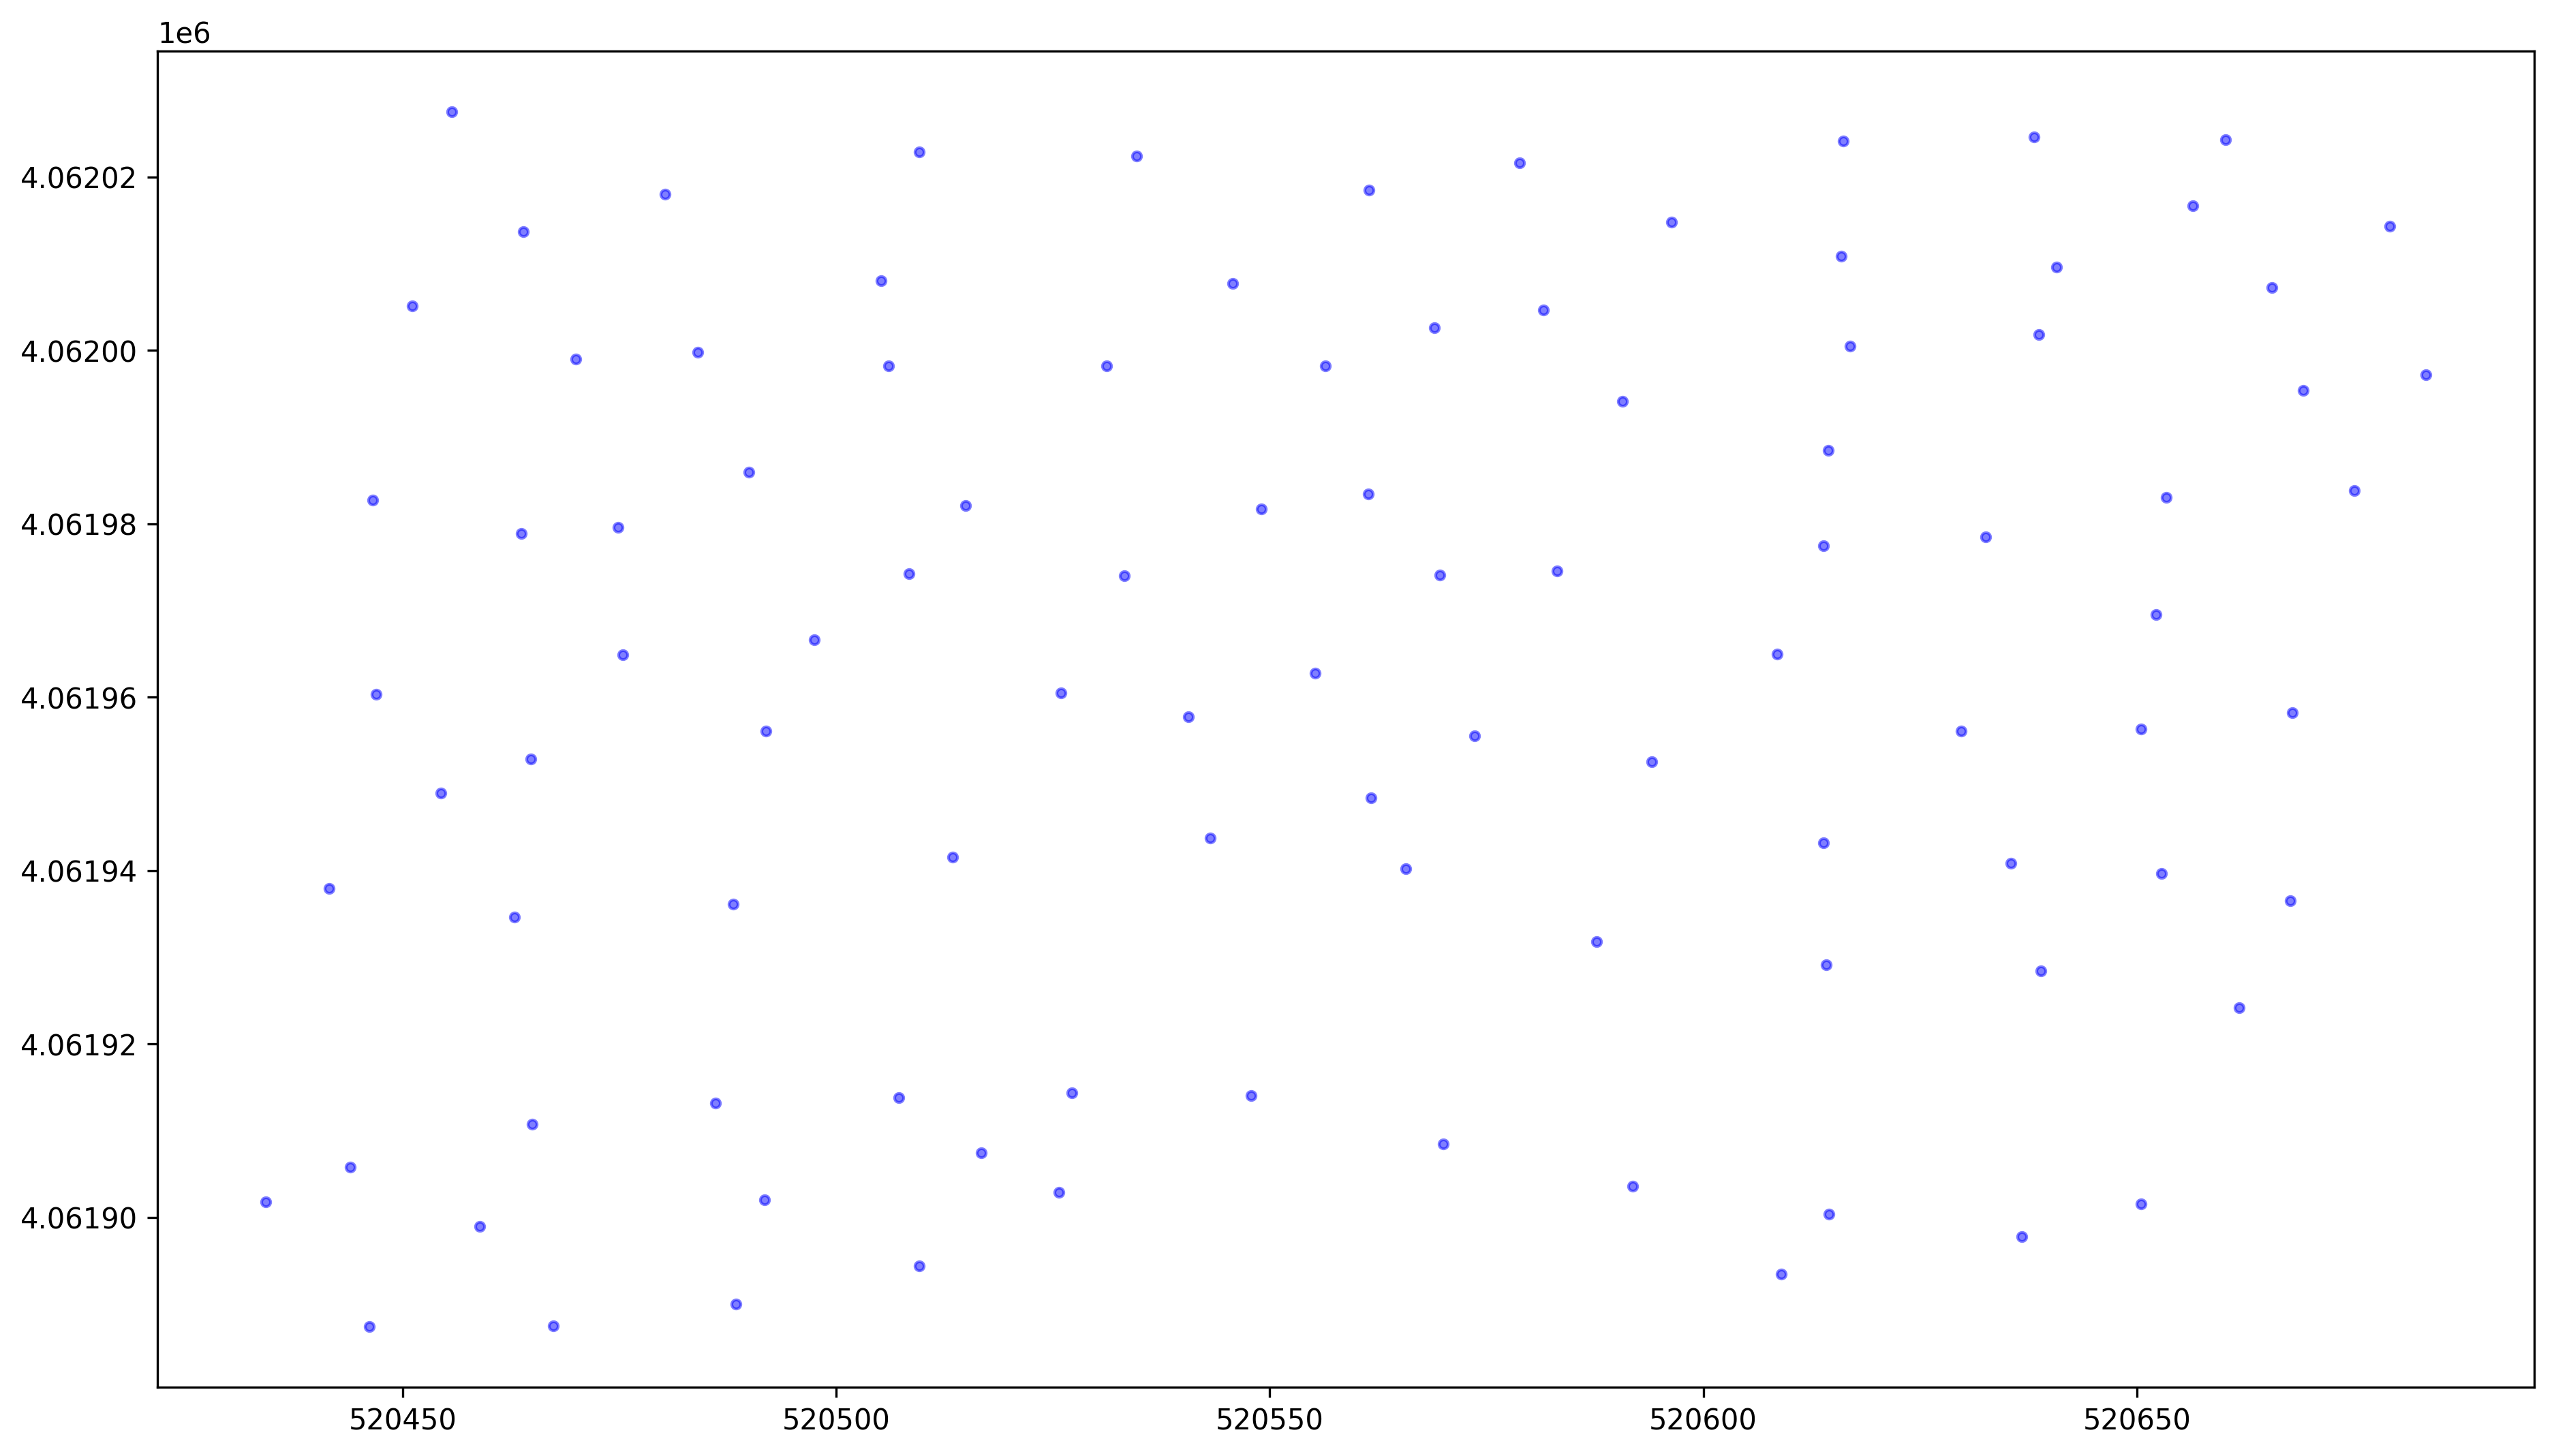

In [4]:
# fig, ax = plt.subplots(figsize=(15, 15),dpi=300)
# ax.set_aspect('equal')
# ax.scatter(points[:,0], points[:,1], s=10, c='b', alpha=0.5)
plt.figure(figsize=(15, 15),dpi=300)
plt.gca().set_aspect('equal')
plt.scatter(points[:,0], points[:,1], s=10, c='b', alpha=0.5)

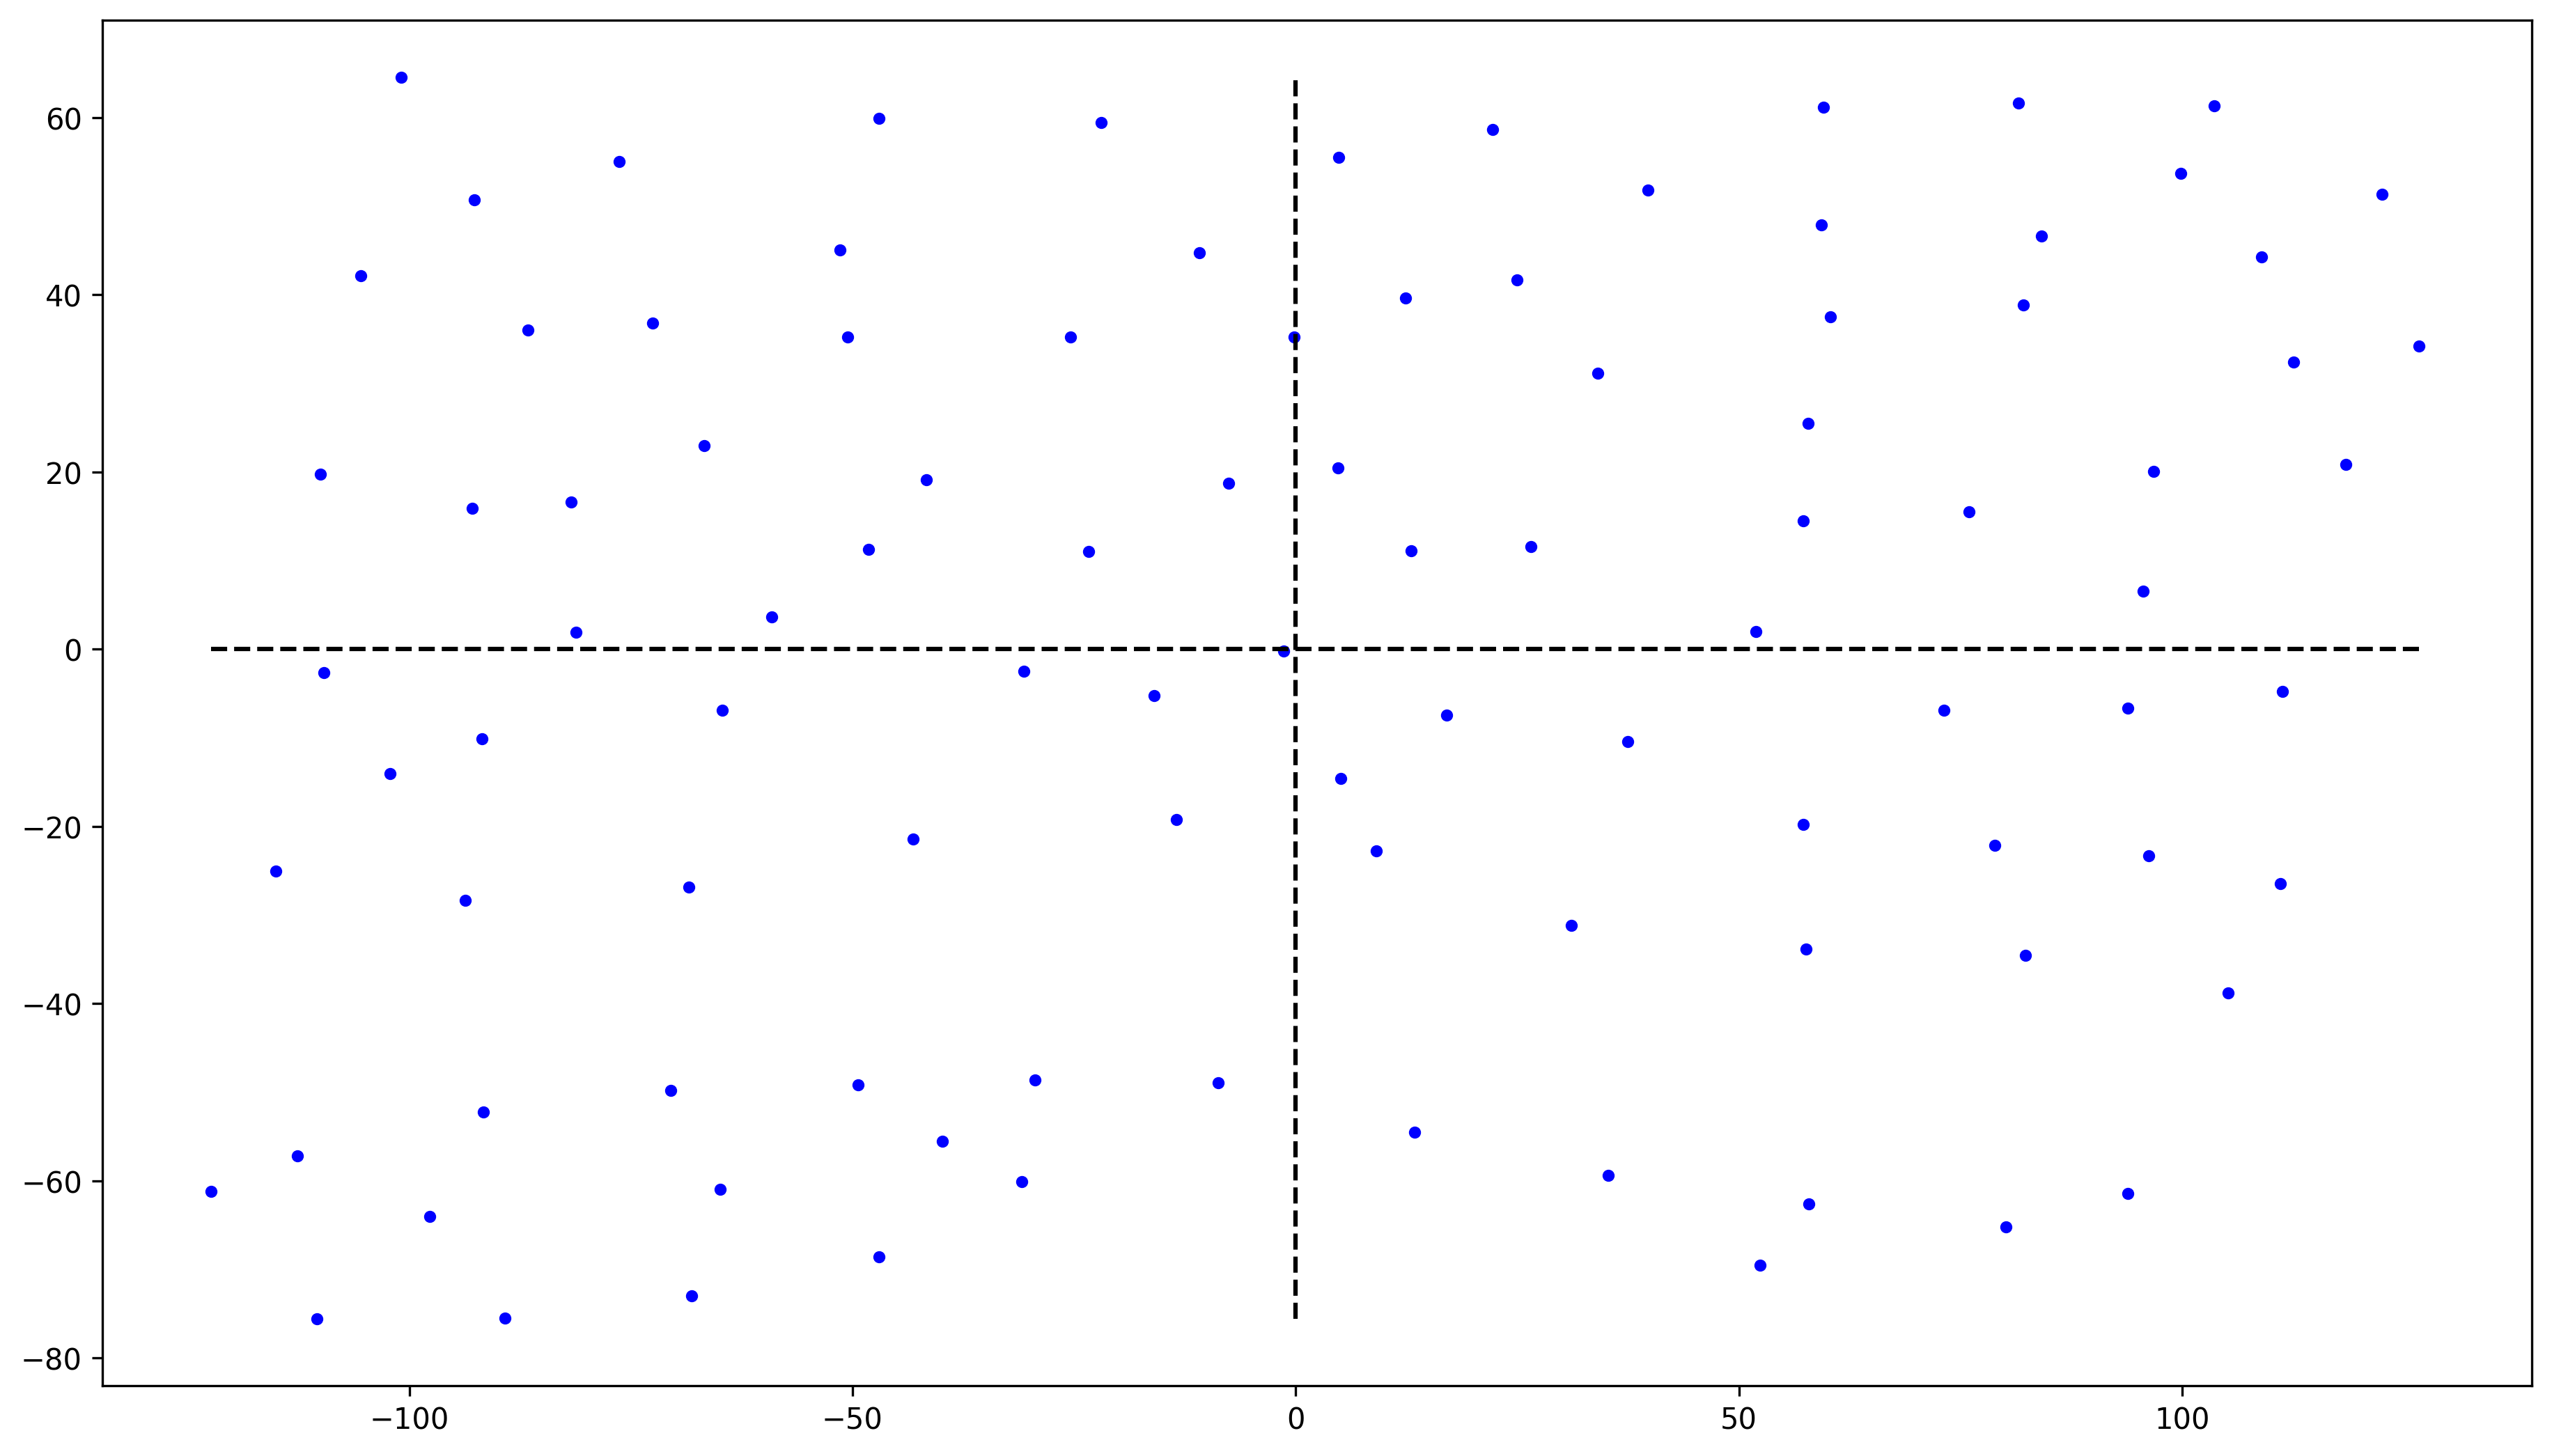

In [5]:
centre = np.mean(points, axis=0)
points_centered = points - centre

points_centered_x_min = points_centered[:,0].min()-abs(points_centered[:,0].min())*0.1
points_centered_x_max = points_centered[:,0].max()+abs(points_centered[:,0].max())*0.1
points_centered_y_min = points_centered[:,1].min()-abs(points_centered[:,1].min())*0.1
points_centered_y_max = points_centered[:,1].max()+abs(points_centered[:,1].max())*0.1

plt.figure(figsize=(15, 15),dpi=300)
# plot lines that x=0 and y=0 as the grey solid lines
plt.plot([points_centered[:,0].min(), points_centered[:,0].max()], [0, 0], 'k--')
plt.plot([0, 0], [points_centered[:,1].min(), points_centered[:,1].max()], 'k--')
plt.xlim(points_centered_x_min, points_centered_x_max)
plt.ylim(points_centered_y_min, points_centered_y_max)
plt.gca().set_aspect('equal')
plt.scatter(points_centered[:,0], points_centered[:,1], s=10, c='b')


## hough transform
- 过一点的任意一条直线可以表示为：
$$\rho = x\cos\theta + y\sin\theta$$

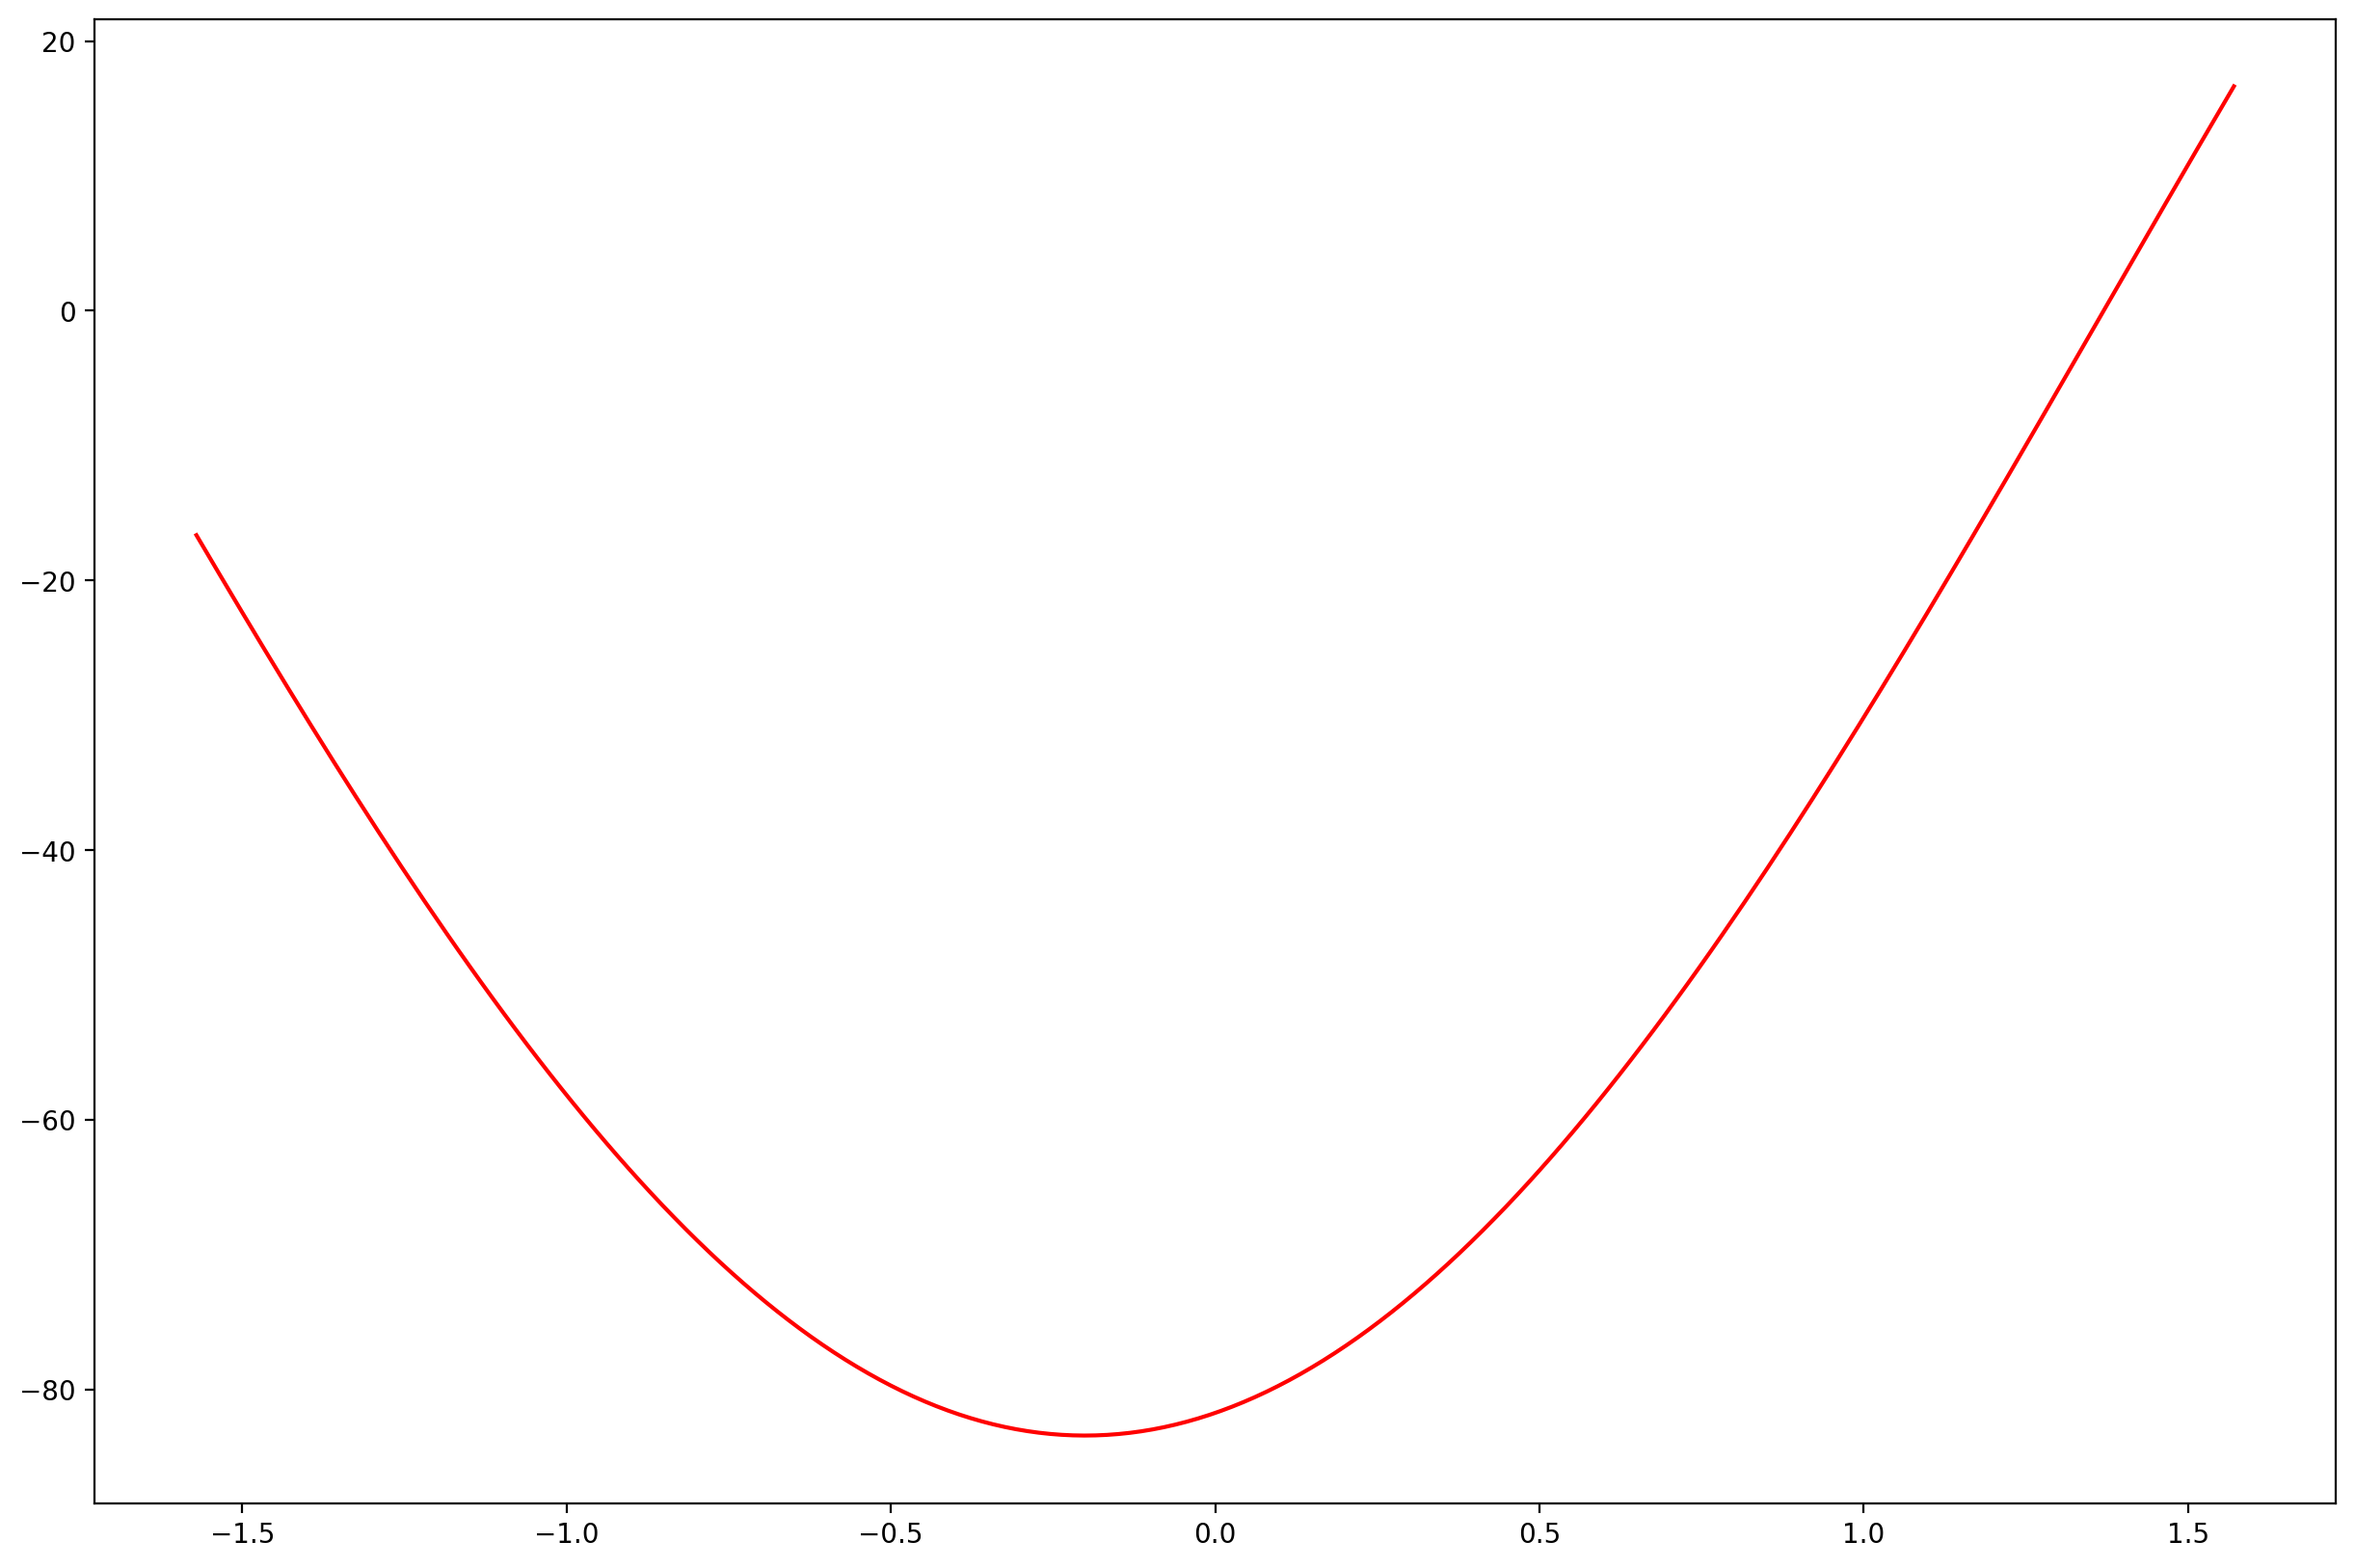

In [6]:
# get an random row from the points with seed
np.random.seed(42)
random_row = np.random.randint(0, len(points))

# get the point corresponding to the random row
random_point = points_centered[random_row]

# using the random point, plot the hough transform
theta_demo = np.linspace(-np.pi/2, np.pi/2, 180)
rho_demo = random_point[0]*np.cos(theta_demo) + random_point[1]*np.sin(theta_demo)
plt.figure(figsize=(15, 10), dpi=200)
plt.plot(theta_demo,rho_demo, 'r')

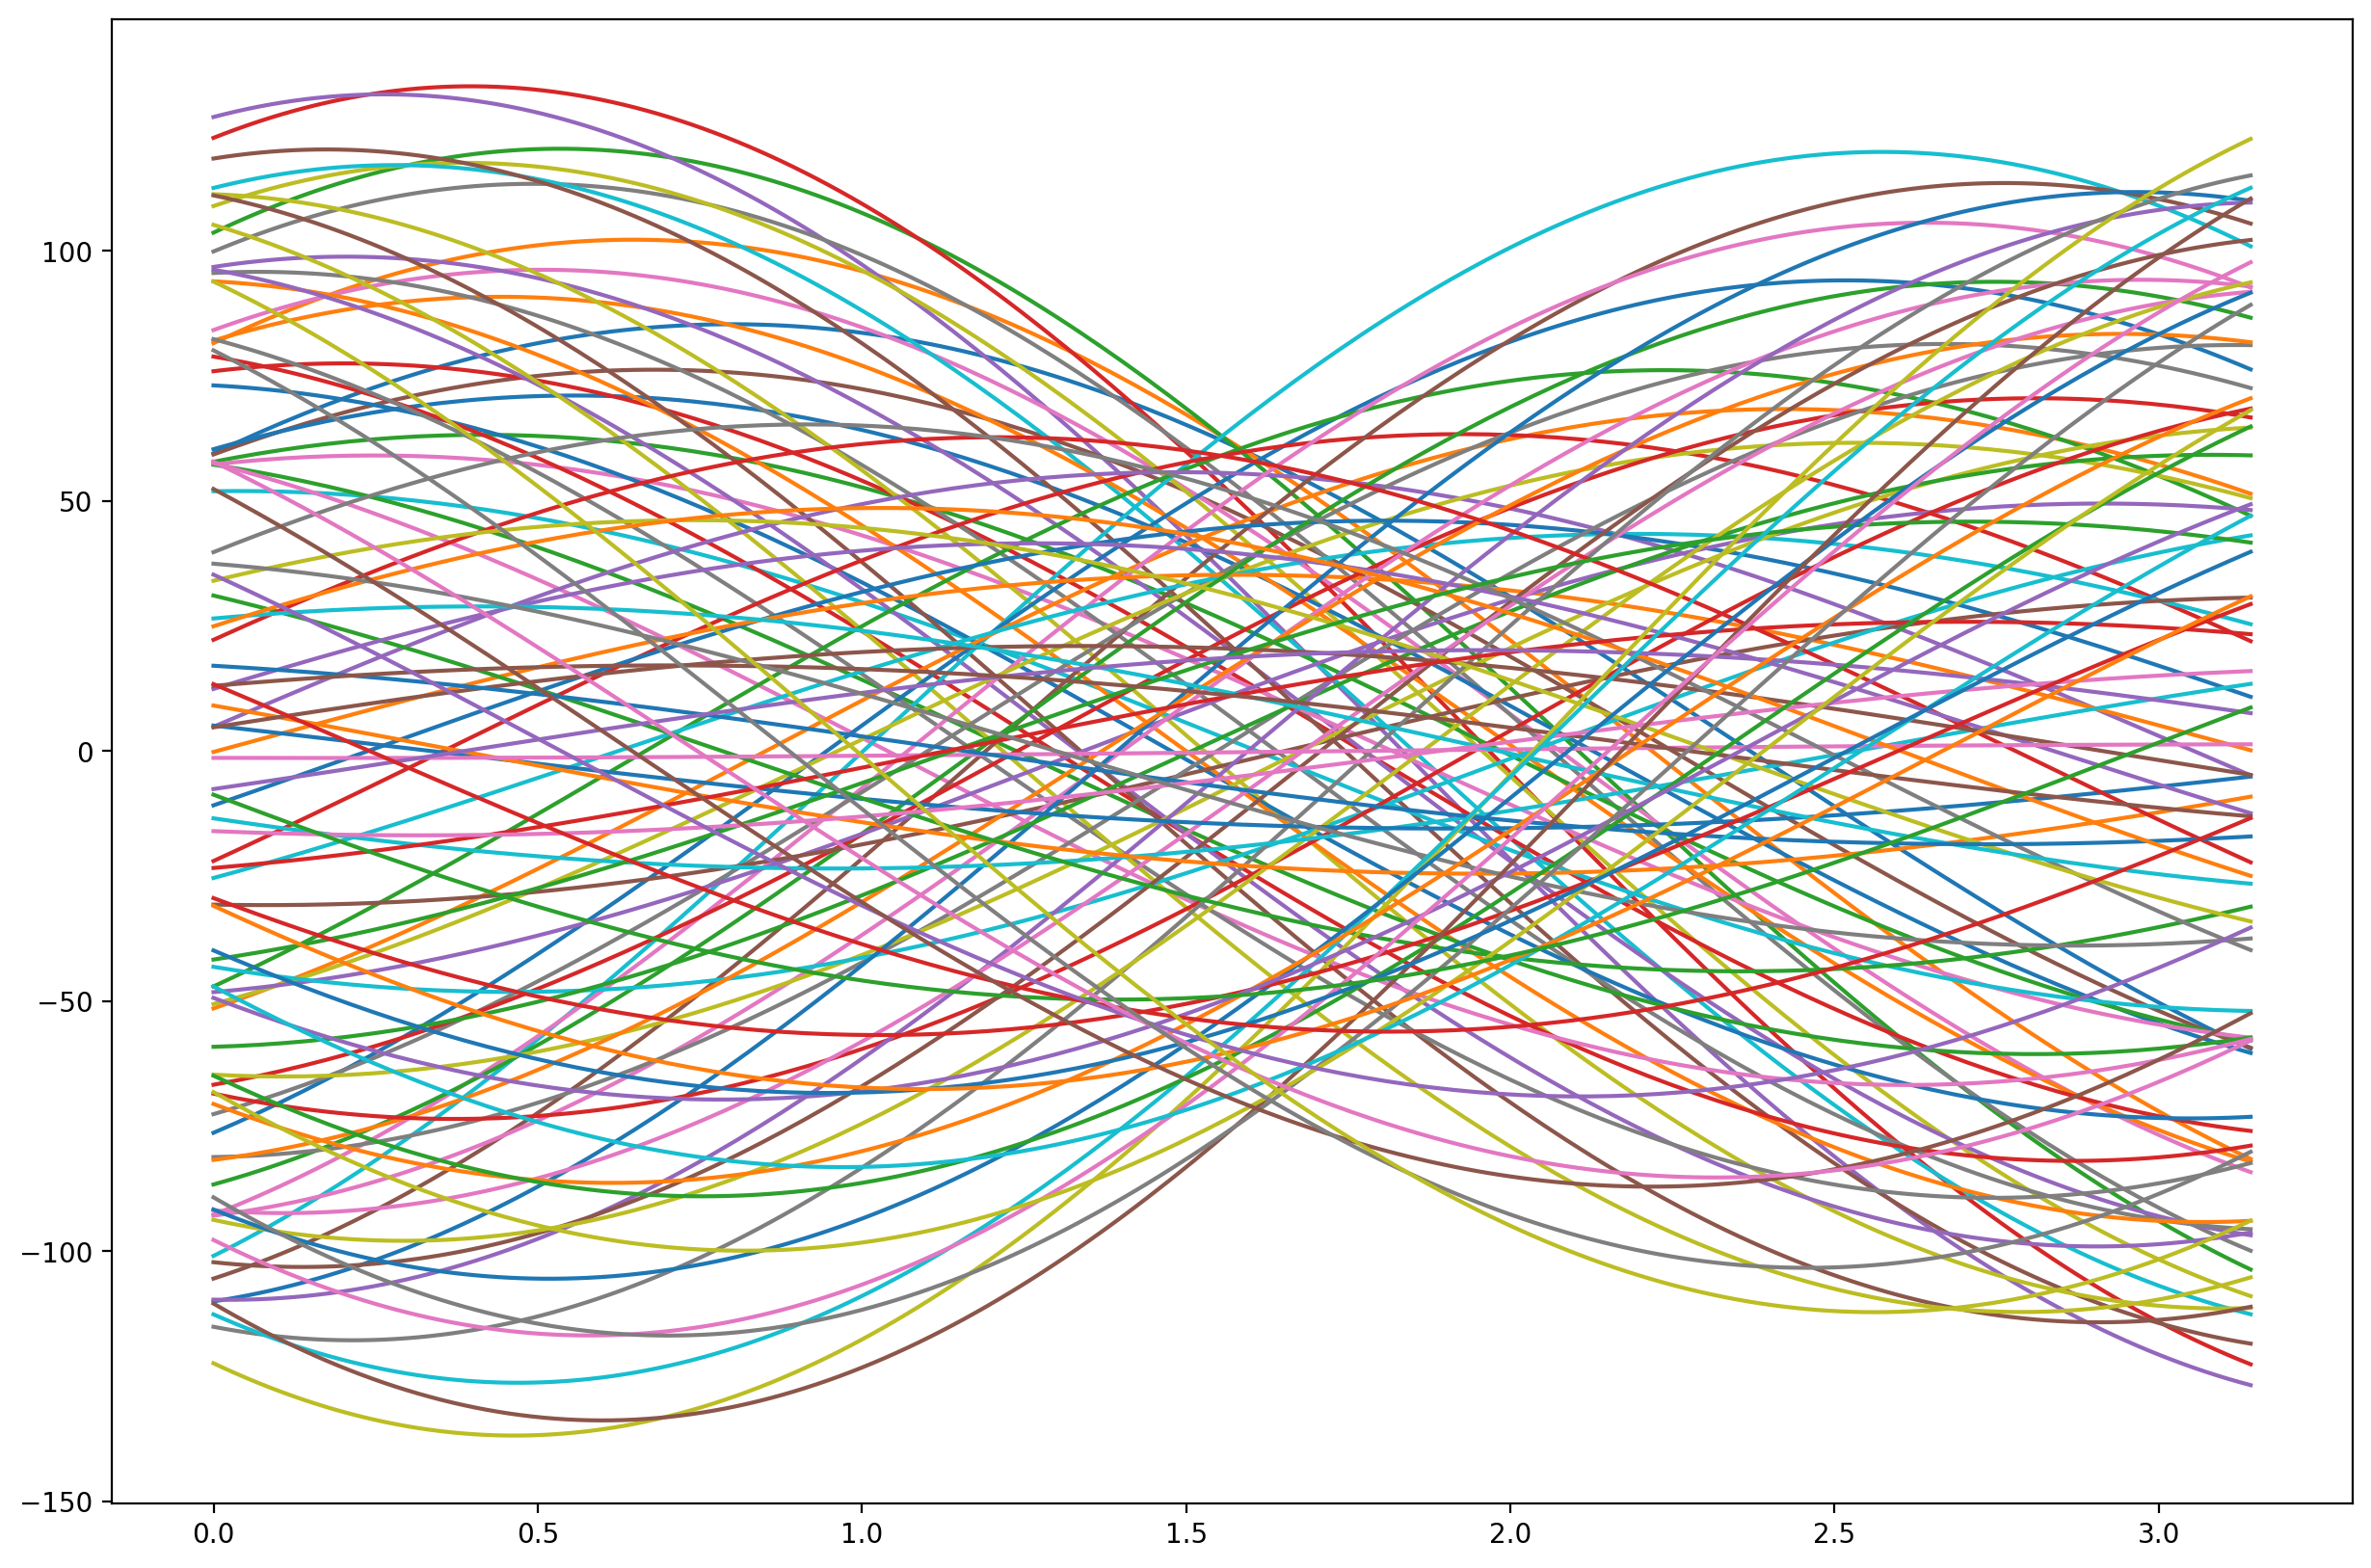

In [7]:
plt.figure(figsize=(15,10),dpi=200)

all_theta = np.linspace(0, np.pi, 180)

for pt_centered in points_centered:
    ith_rho = pt_centered[0]*np.cos(all_theta) + pt_centered[1]*np.sin(all_theta)
    plt.plot(all_theta, ith_rho)

C:\Users\wukon\AppData\Local\Temp\ipykernel_34524\227093518.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  theta = atan((x_j - x_i) / (y_i - y_j))


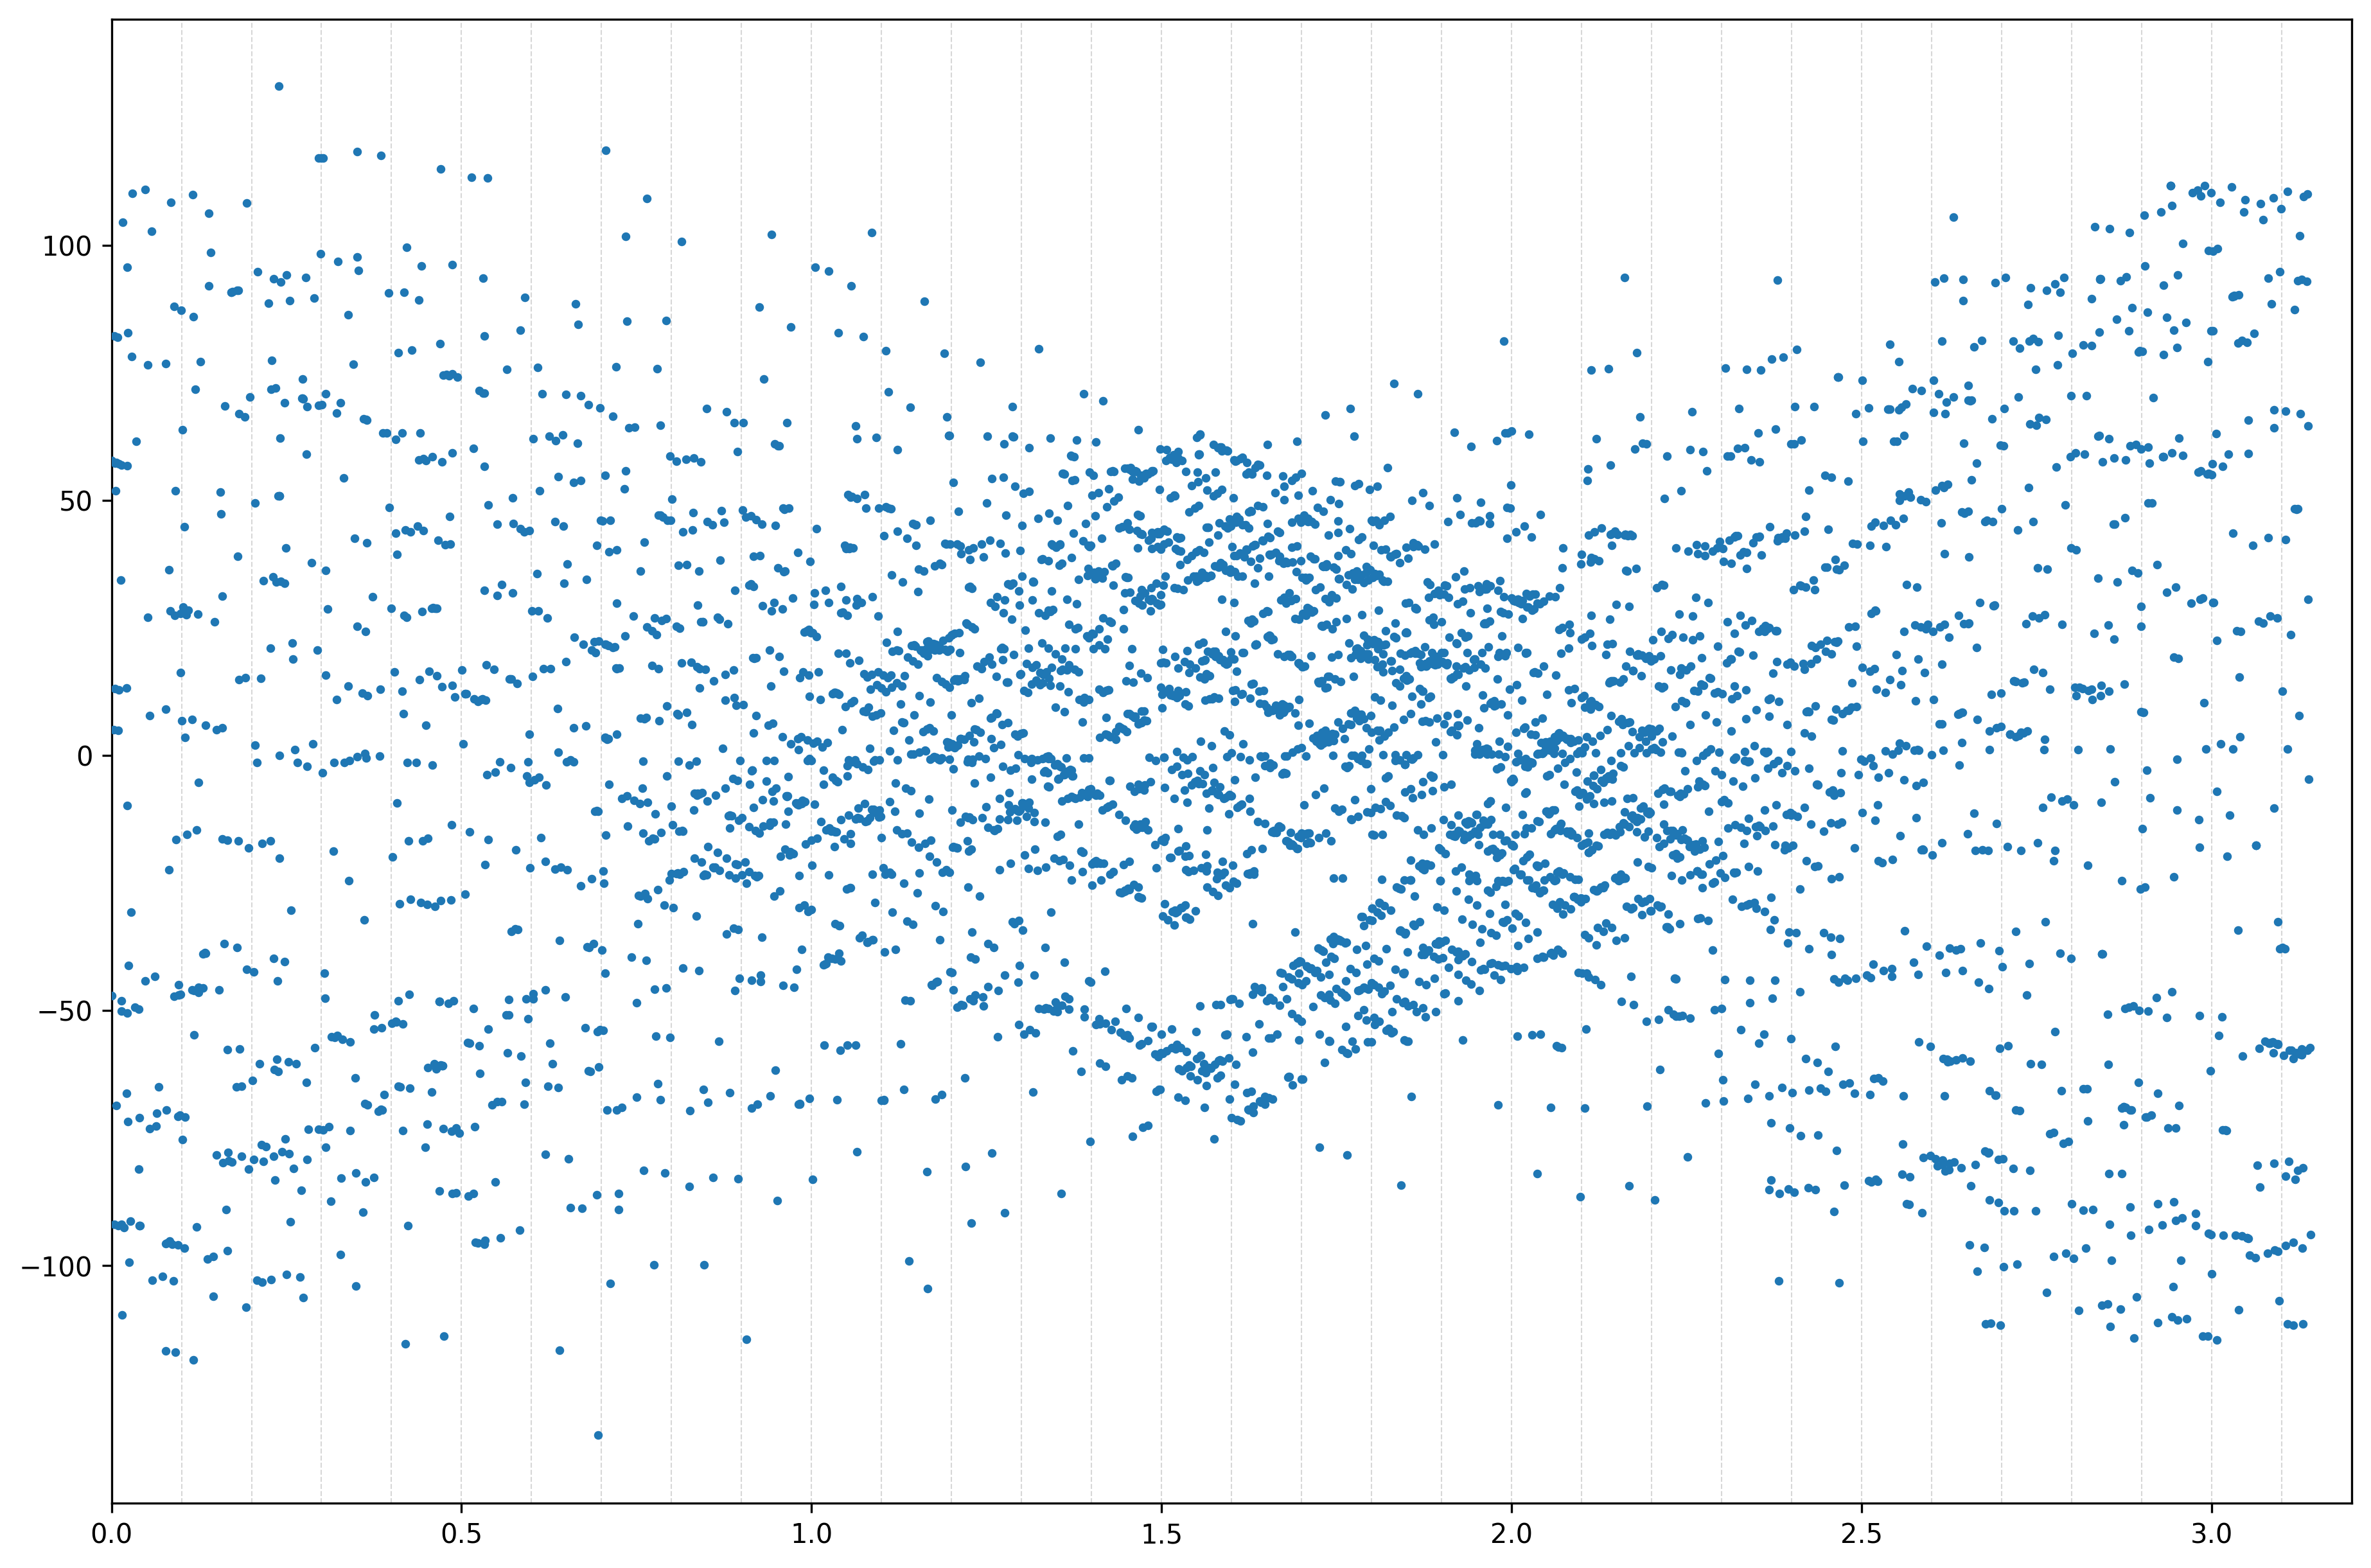

In [10]:
def hough_transform(points):

    centre = np.mean(points, axis=0)
    points_num = points.shape[0]
    row_transformed_data = int(points_num * (points_num - 1) / 2)
    hough_space = np.zeros(shape=(row_transformed_data, 4))

    for i in range(points_num):
        for j in range(i + 1, points_num):
            idx = int(i * points_num - i * (i + 1) / 2 + j - i - 1)

            x_i, y_i = points[i] - centre
            x_j, y_j = points[j] - centre

            theta = atan((x_j - x_i) / (y_i - y_j))
            if theta < 0:
                theta += np.pi
            rho = x_i * cos(theta) + y_i * sin(theta)

            hough_space[idx][0] = theta
            hough_space[idx][1] = rho
            hough_space[idx][2] = i
            hough_space[idx][3] = j

    return hough_space


points_hough_space = hough_transform(points)

points_hough_space_x = points_hough_space[:, 0]
points_hough_space_y = points_hough_space[:, 1]

y_min = points_hough_space_y.min() - abs(points_hough_space_y.min()) * 0.1
y_max = points_hough_space_y.max() + abs(points_hough_space_y.max()) * 0.1
x_min = 0
x_max = 3.2

# plt.figure(figsize=(15,10),dpi=300)
# # add vertical lines
# vlines_x = np.arange(-1.6,1.6,0.1)
# for vline_x in vlines_x:
#     vline_x = float(vline_x)
#     plt.axvline(x=vline_x, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.9)
# plt.scatter(points_hough_space_x, points_hough_space_y,s=5)


fig, ax1 = plt.subplots(figsize=(15, 10), dpi=300)
vlines_x = np.arange(x_min,x_max,0.1)
for vline_x in vlines_x:
    vline_x = float(vline_x)
    ax1.axvline(x=vline_x, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.9,zorder=0)

# plot the scatter of hough space points
ax1.set_ylim(y_min, y_max)
ax1.set_xlim(x_min, x_max)
ax1.scatter(points_hough_space_x, points_hough_space_y, s=5,zorder =5)

C:\Users\wukon\AppData\Local\Temp\ipykernel_34524\227093518.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  theta = atan((x_j - x_i) / (y_i - y_j))


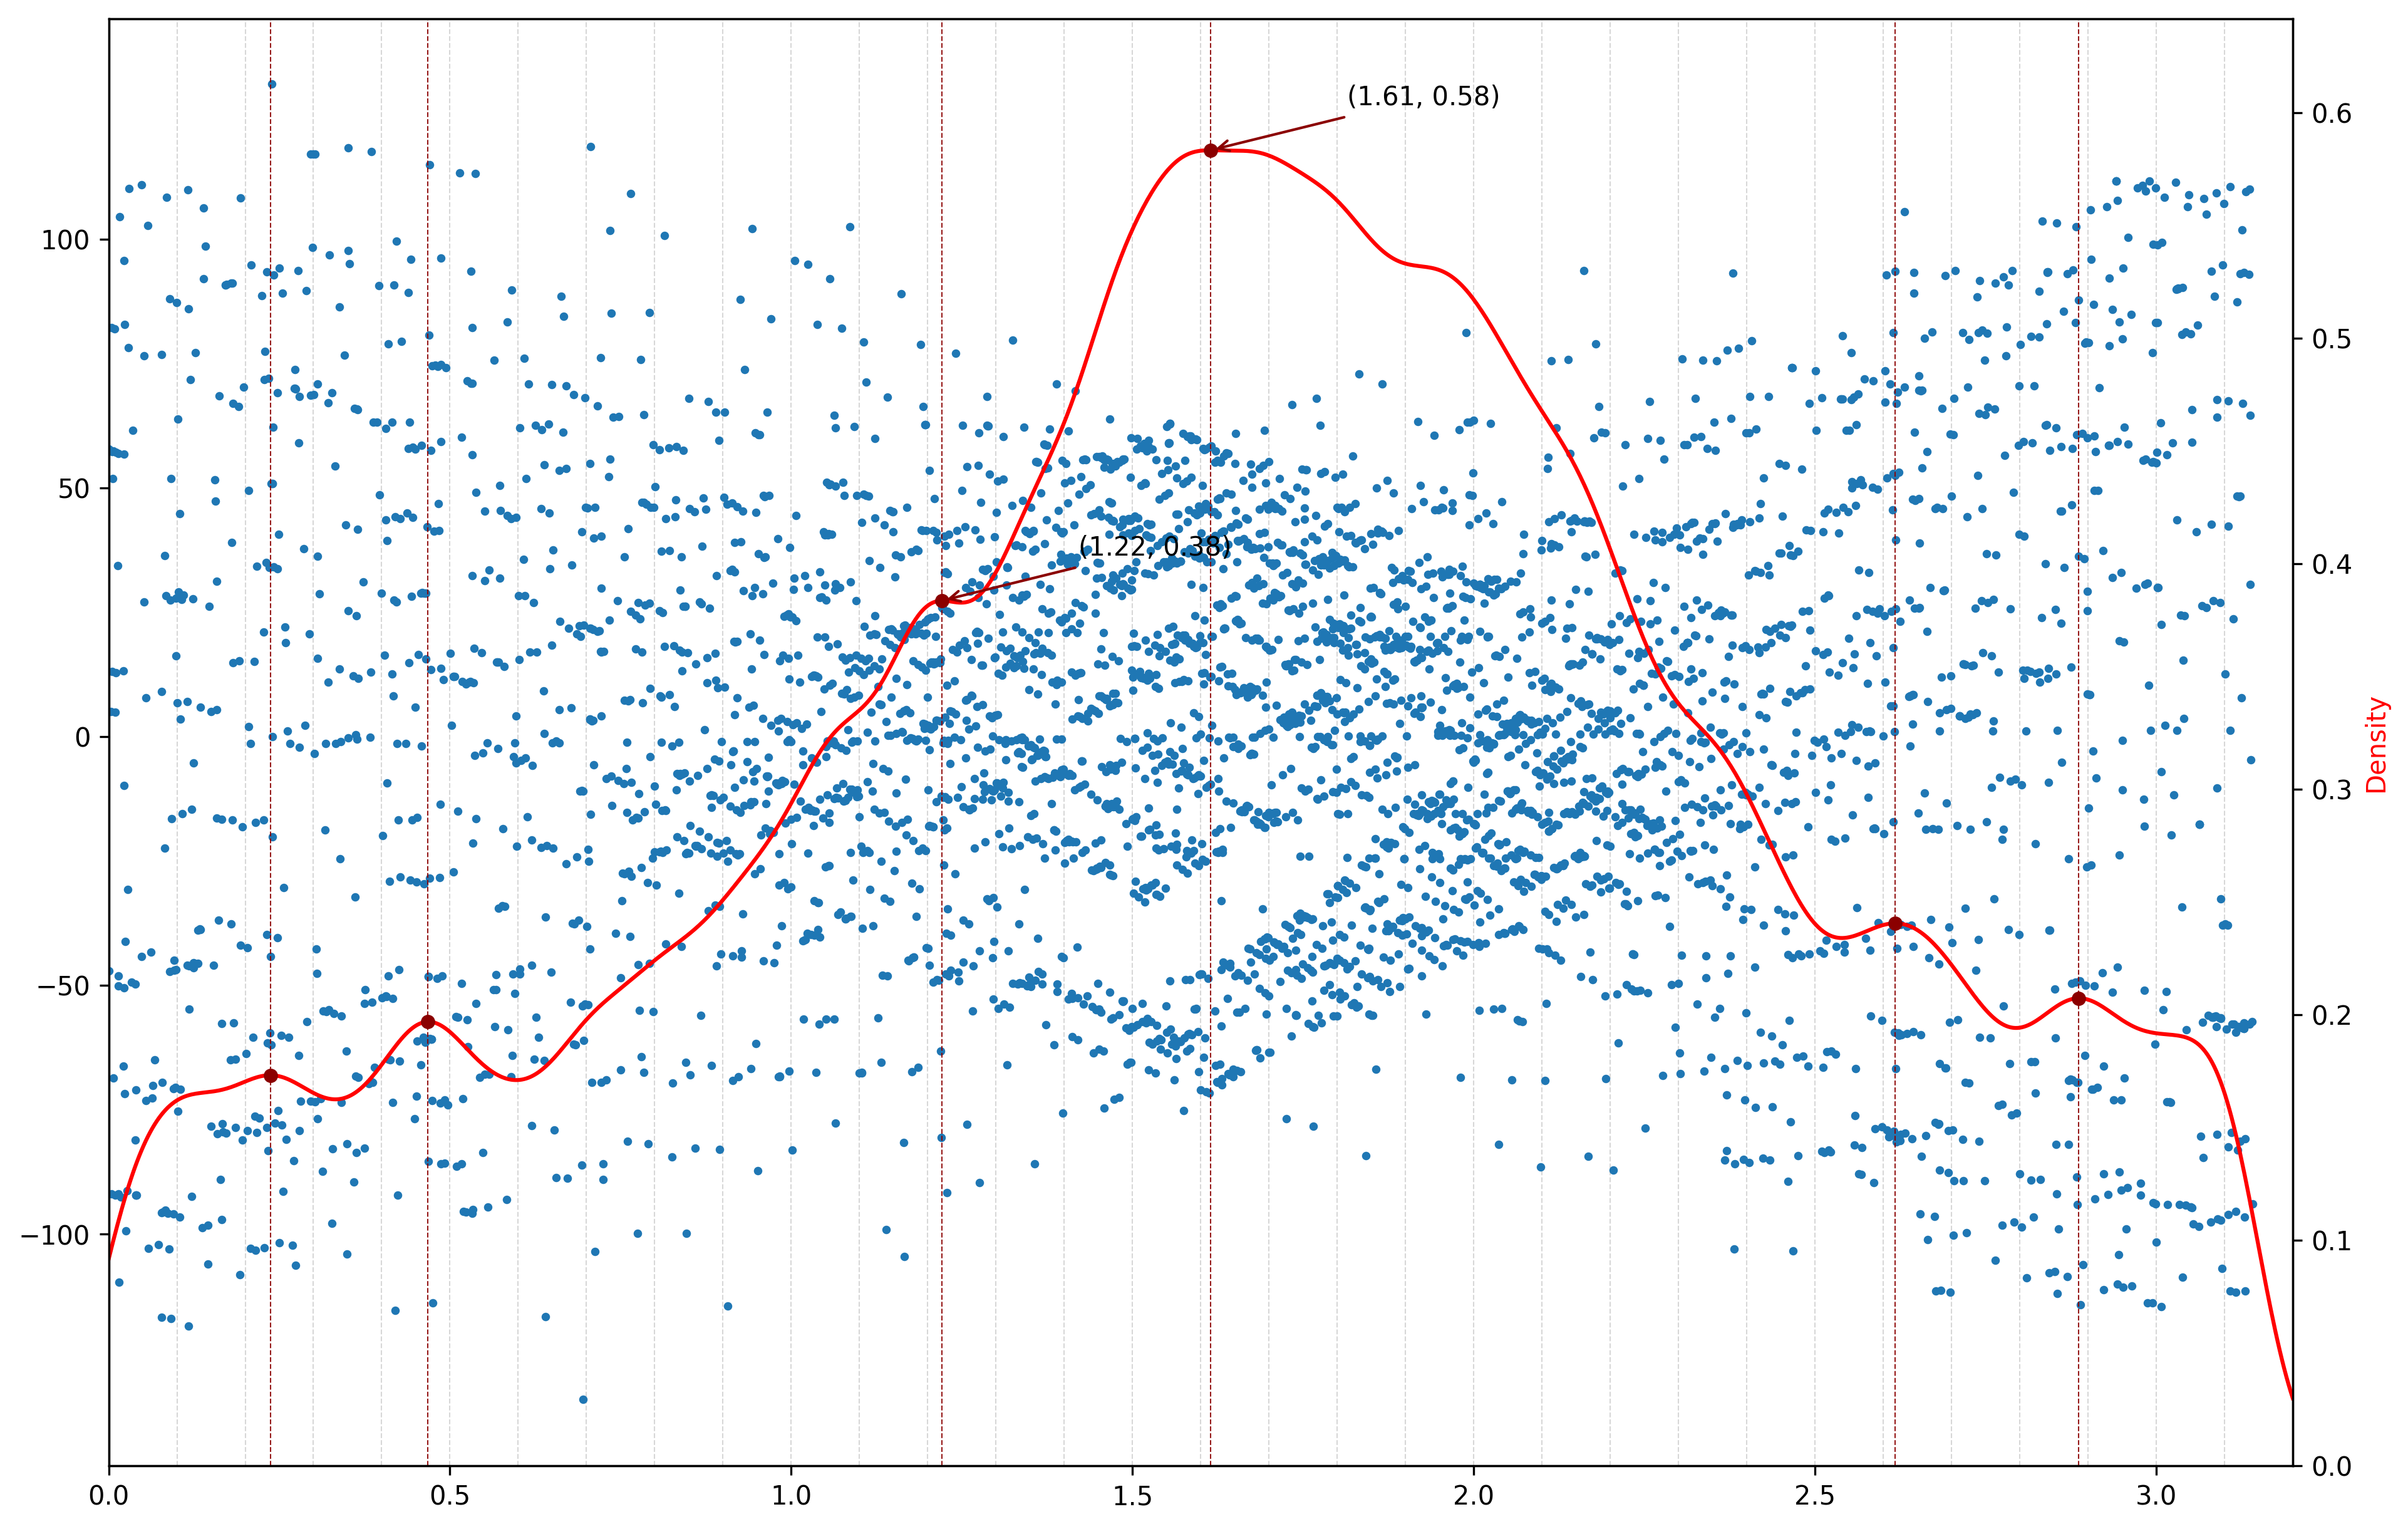

In [21]:
points_hough_space = hough_transform(points)

points_hough_space_x = points_hough_space[:, 0]
points_hough_space_y = points_hough_space[:, 1]

y_min = points_hough_space_y.min() - abs(points_hough_space_y.min()) * 0.1
y_max = points_hough_space_y.max() + abs(points_hough_space_y.max()) * 0.1
x_min = 0
x_max = 3.2

# plt.figure(figsize=(15,10),dpi=300)
# # add vertical lines
# vlines_x = np.arange(-1.6,1.6,0.1)
# for vline_x in vlines_x:
#     vline_x = float(vline_x)
#     plt.axvline(x=vline_x, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.9)
# plt.scatter(points_hough_space_x, points_hough_space_y,s=5)


fig, ax1 = plt.subplots(figsize=(15, 10), dpi=300)
vlines_x = np.arange(x_min,x_max,0.1)
for vline_x in vlines_x:
    vline_x = float(vline_x)
    ax1.axvline(x=vline_x, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.9,zorder=0)

# plot the scatter of hough space points
ax1.set_ylim(y_min, y_max)
ax1.set_xlim(x_min, x_max)
ax1.scatter(points_hough_space_x, points_hough_space_y, s=5,zorder =5)
# plot the KDE of hough space points
ax2 = ax1.twinx()

kde = stats.gaussian_kde(points_hough_space_x, bw_method=0.07)
kde_x = np.linspace(x_min, x_max, 1000)
kde_y = kde(kde_x)


# the kde curve
ax2.plot(kde_x, kde_y, color='red', label='KDE',zorder = 2)
ax2.set_ylim(0, kde_y.max()*1.1)
ax2.set_ylabel('Density', color='red')

# the kde peaks
peaks, _ = find_peaks(kde_y)
peak_x = kde_x[peaks]
peak_y = kde_y[peaks]


ax2.scatter(peak_x, peak_y, color='darkred',s=20, label='KDE peaks',zorder =3)
for pk_x in peak_x:
    ax2.axvline(x=pk_x, color='darkred', linestyle='--', linewidth=0.5, alpha=0.9,zorder=1)

peak_x = peak_x.reshape(-1,1)
peak_y = peak_y.reshape(-1,1)
peak_xy = np.hstack((peak_x,peak_y))
top_two_peaks = fg.find_top_two_kde_peaks(peak_xy)

for i,(px,py) in enumerate(top_two_peaks):
    ax2.annotate(f'({px:.2f}, {py:.2f})', 
                 xy=(px, py), 
                 xytext=(px+0.2, py+0.02),
                 arrowprops=dict(arrowstyle='->', color='darkred'),
                 fontsize=10,
                 zorder =3)

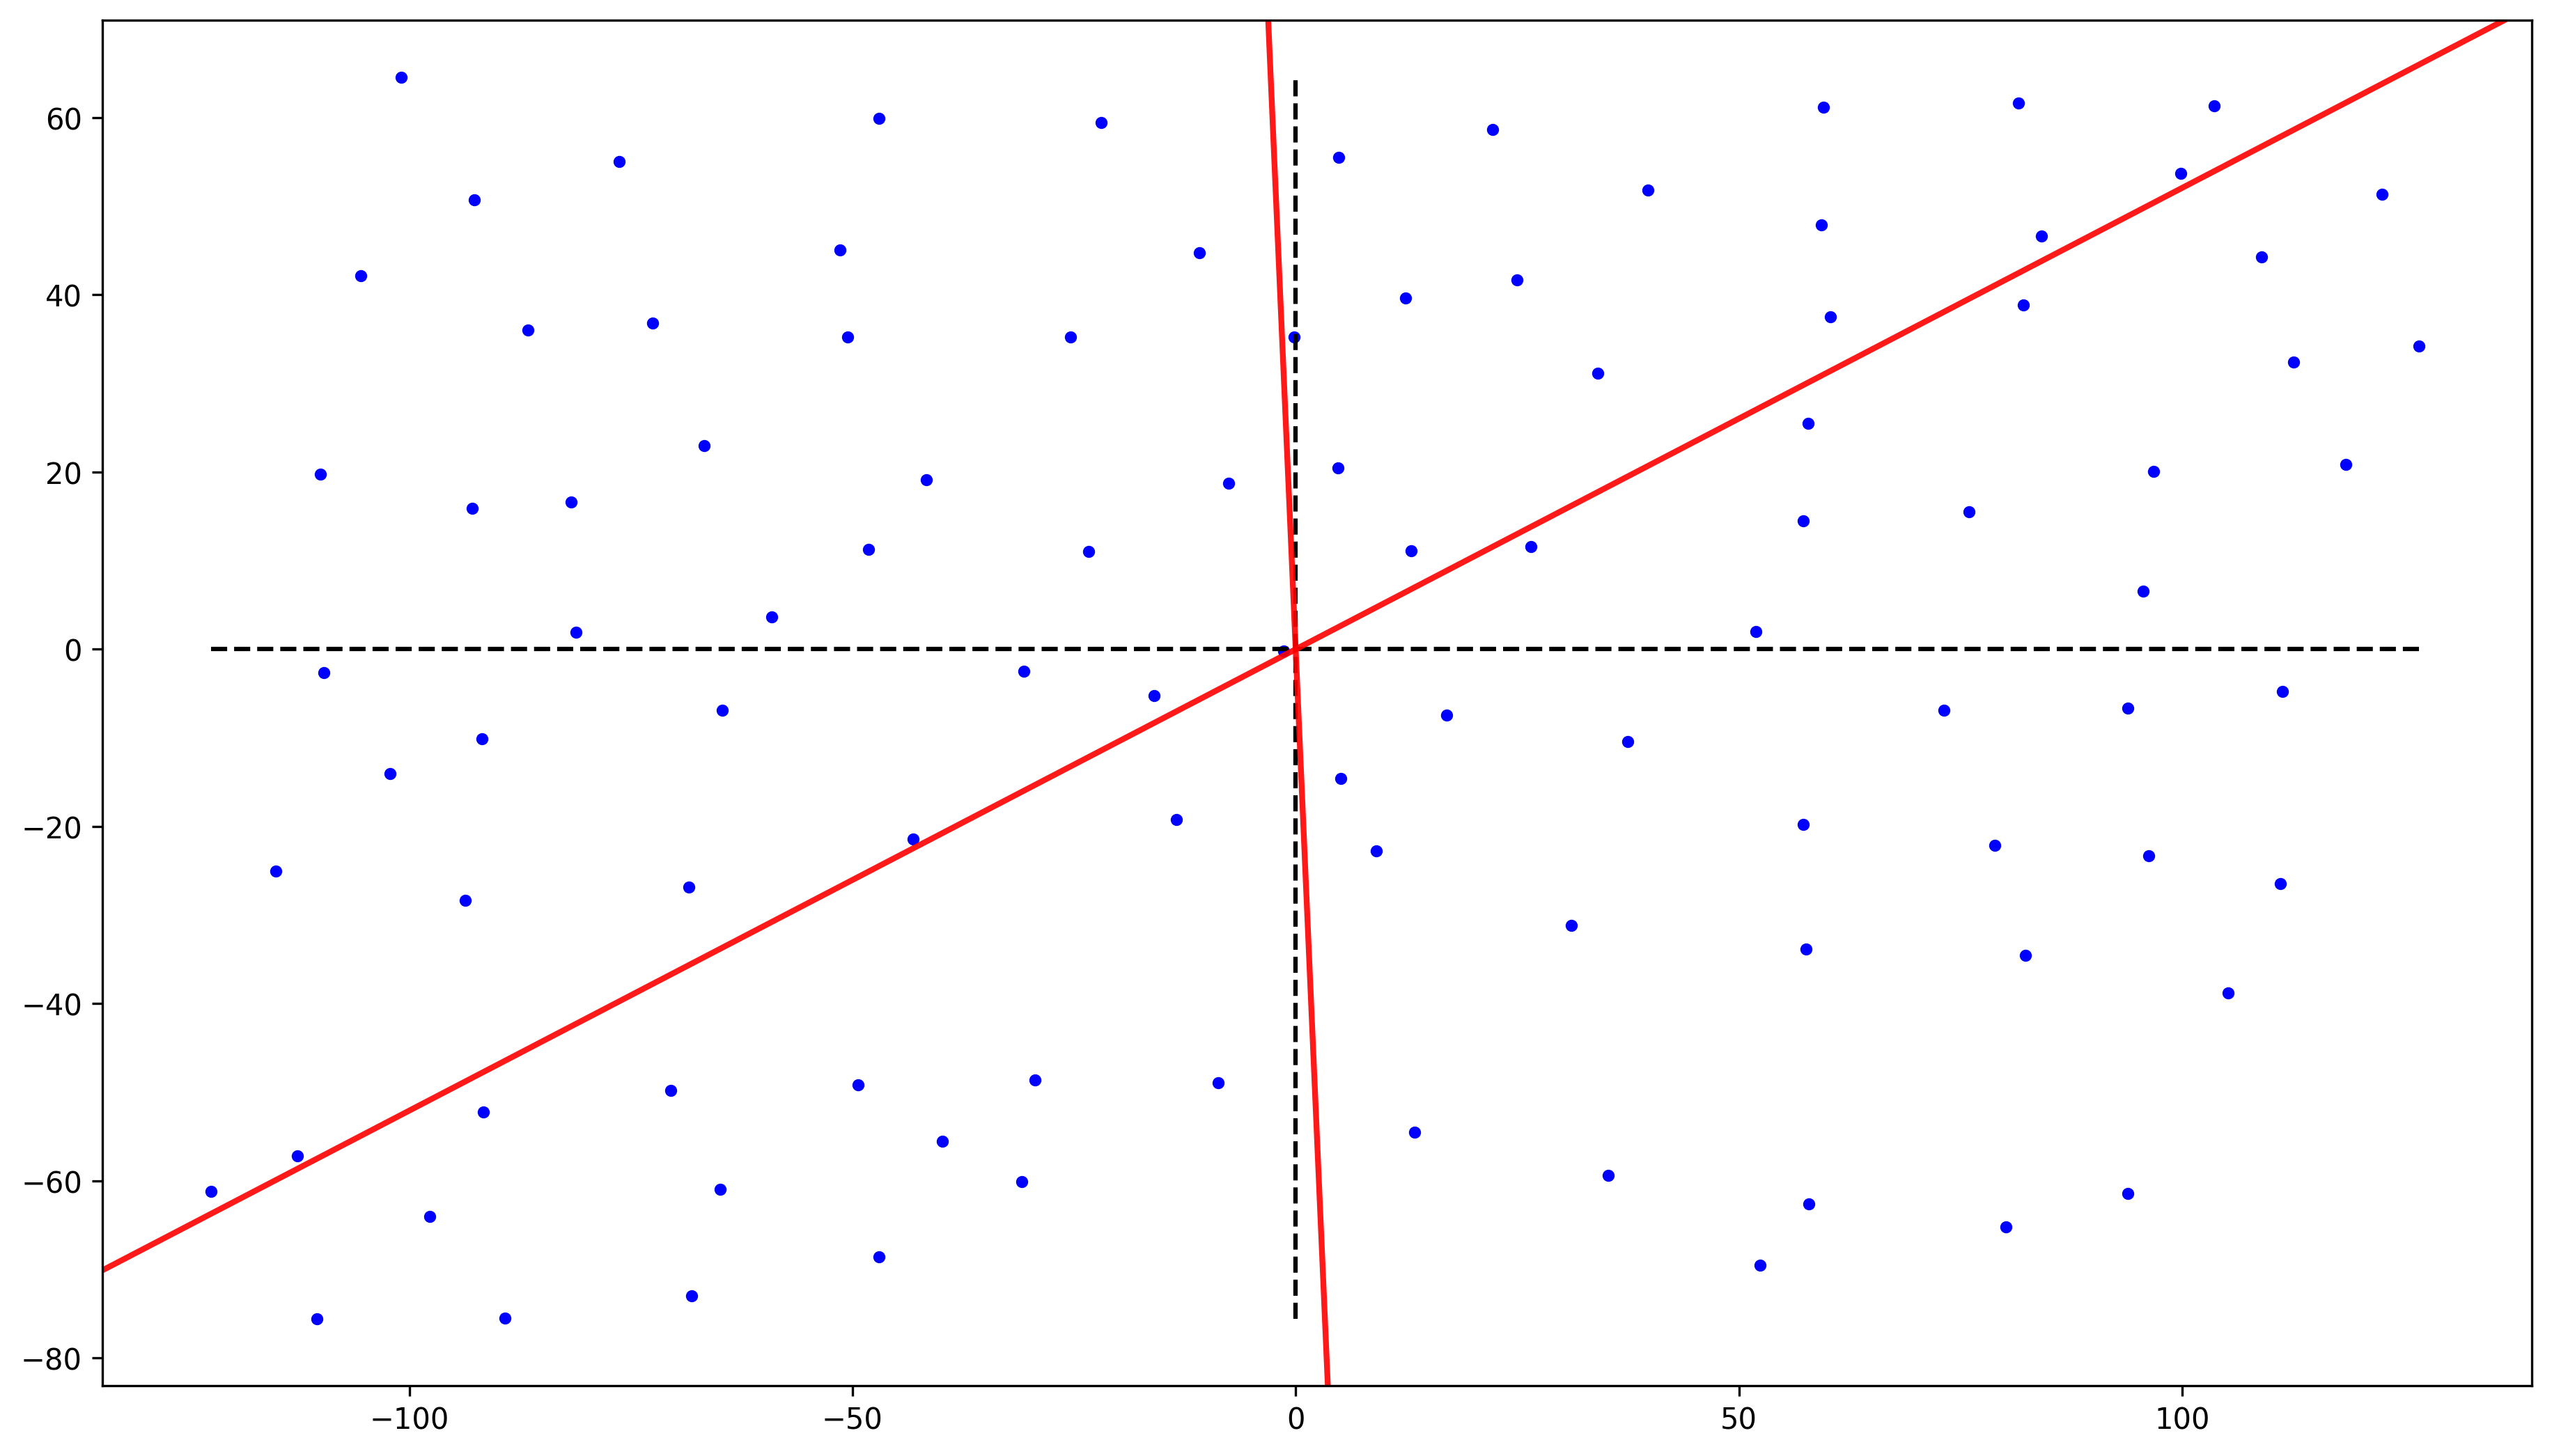

In [22]:
centre = np.mean(points, axis=0)
points_centered = points - centre

points_centered_x_min = points_centered[:,0].min()-abs(points_centered[:,0].min())*0.1
points_centered_x_max = points_centered[:,0].max()+abs(points_centered[:,0].max())*0.1
points_centered_y_min = points_centered[:,1].min()-abs(points_centered[:,1].min())*0.1
points_centered_y_max = points_centered[:,1].max()+abs(points_centered[:,1].max())*0.1

plt.figure(figsize=(15, 15),dpi=300)
# plot lines that x=0 and y=0 as the grey solid lines
plt.plot([points_centered[:,0].min(), points_centered[:,0].max()], [0, 0], 'k--')
plt.plot([0, 0], [points_centered[:,1].min(), points_centered[:,1].max()], 'k--')
plt.xlim(points_centered_x_min, points_centered_x_max)
plt.ylim(points_centered_y_min, points_centered_y_max)
plt.gca().set_aspect('equal')
plt.scatter(points_centered[:,0], points_centered[:,1], s=10, c='b')

theta_i = top_two_peaks[0,0]
theta_j = 0.48



def get_line_by_angle(angle_radians, x_min, x_max, **kwargs):
    """
    绘制指定角度的直线
    
    参数:
    angle_radians: 弧度
    x_range: x轴范围
    **kwargs: 传递给plot的参数
    """

    
    # 计算斜率
    slope = np.tan(angle_radians)
    
    # 生成x值
    x = np.linspace(x_min, x_max, 100)
    
    # 计算对应的y值（通过原点）
    y = slope * x
    
    # 绘制直线
    
    return x,y

theta_i_x,theta_i_y = get_line_by_angle(theta_i, points_centered_x_min, points_centered_x_max)
theta_j_x,theta_j_y = get_line_by_angle(theta_j, points_centered_x_min, points_centered_x_max)

plt.plot(theta_i_x, theta_i_y, c='red',alpha=0.9,linewidth=2)
plt.plot(theta_j_x, theta_j_y, c='red',alpha=0.9,linewidth=2)


C:\Users\wukon\AppData\Local\Temp\ipykernel_34524\4128061756.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


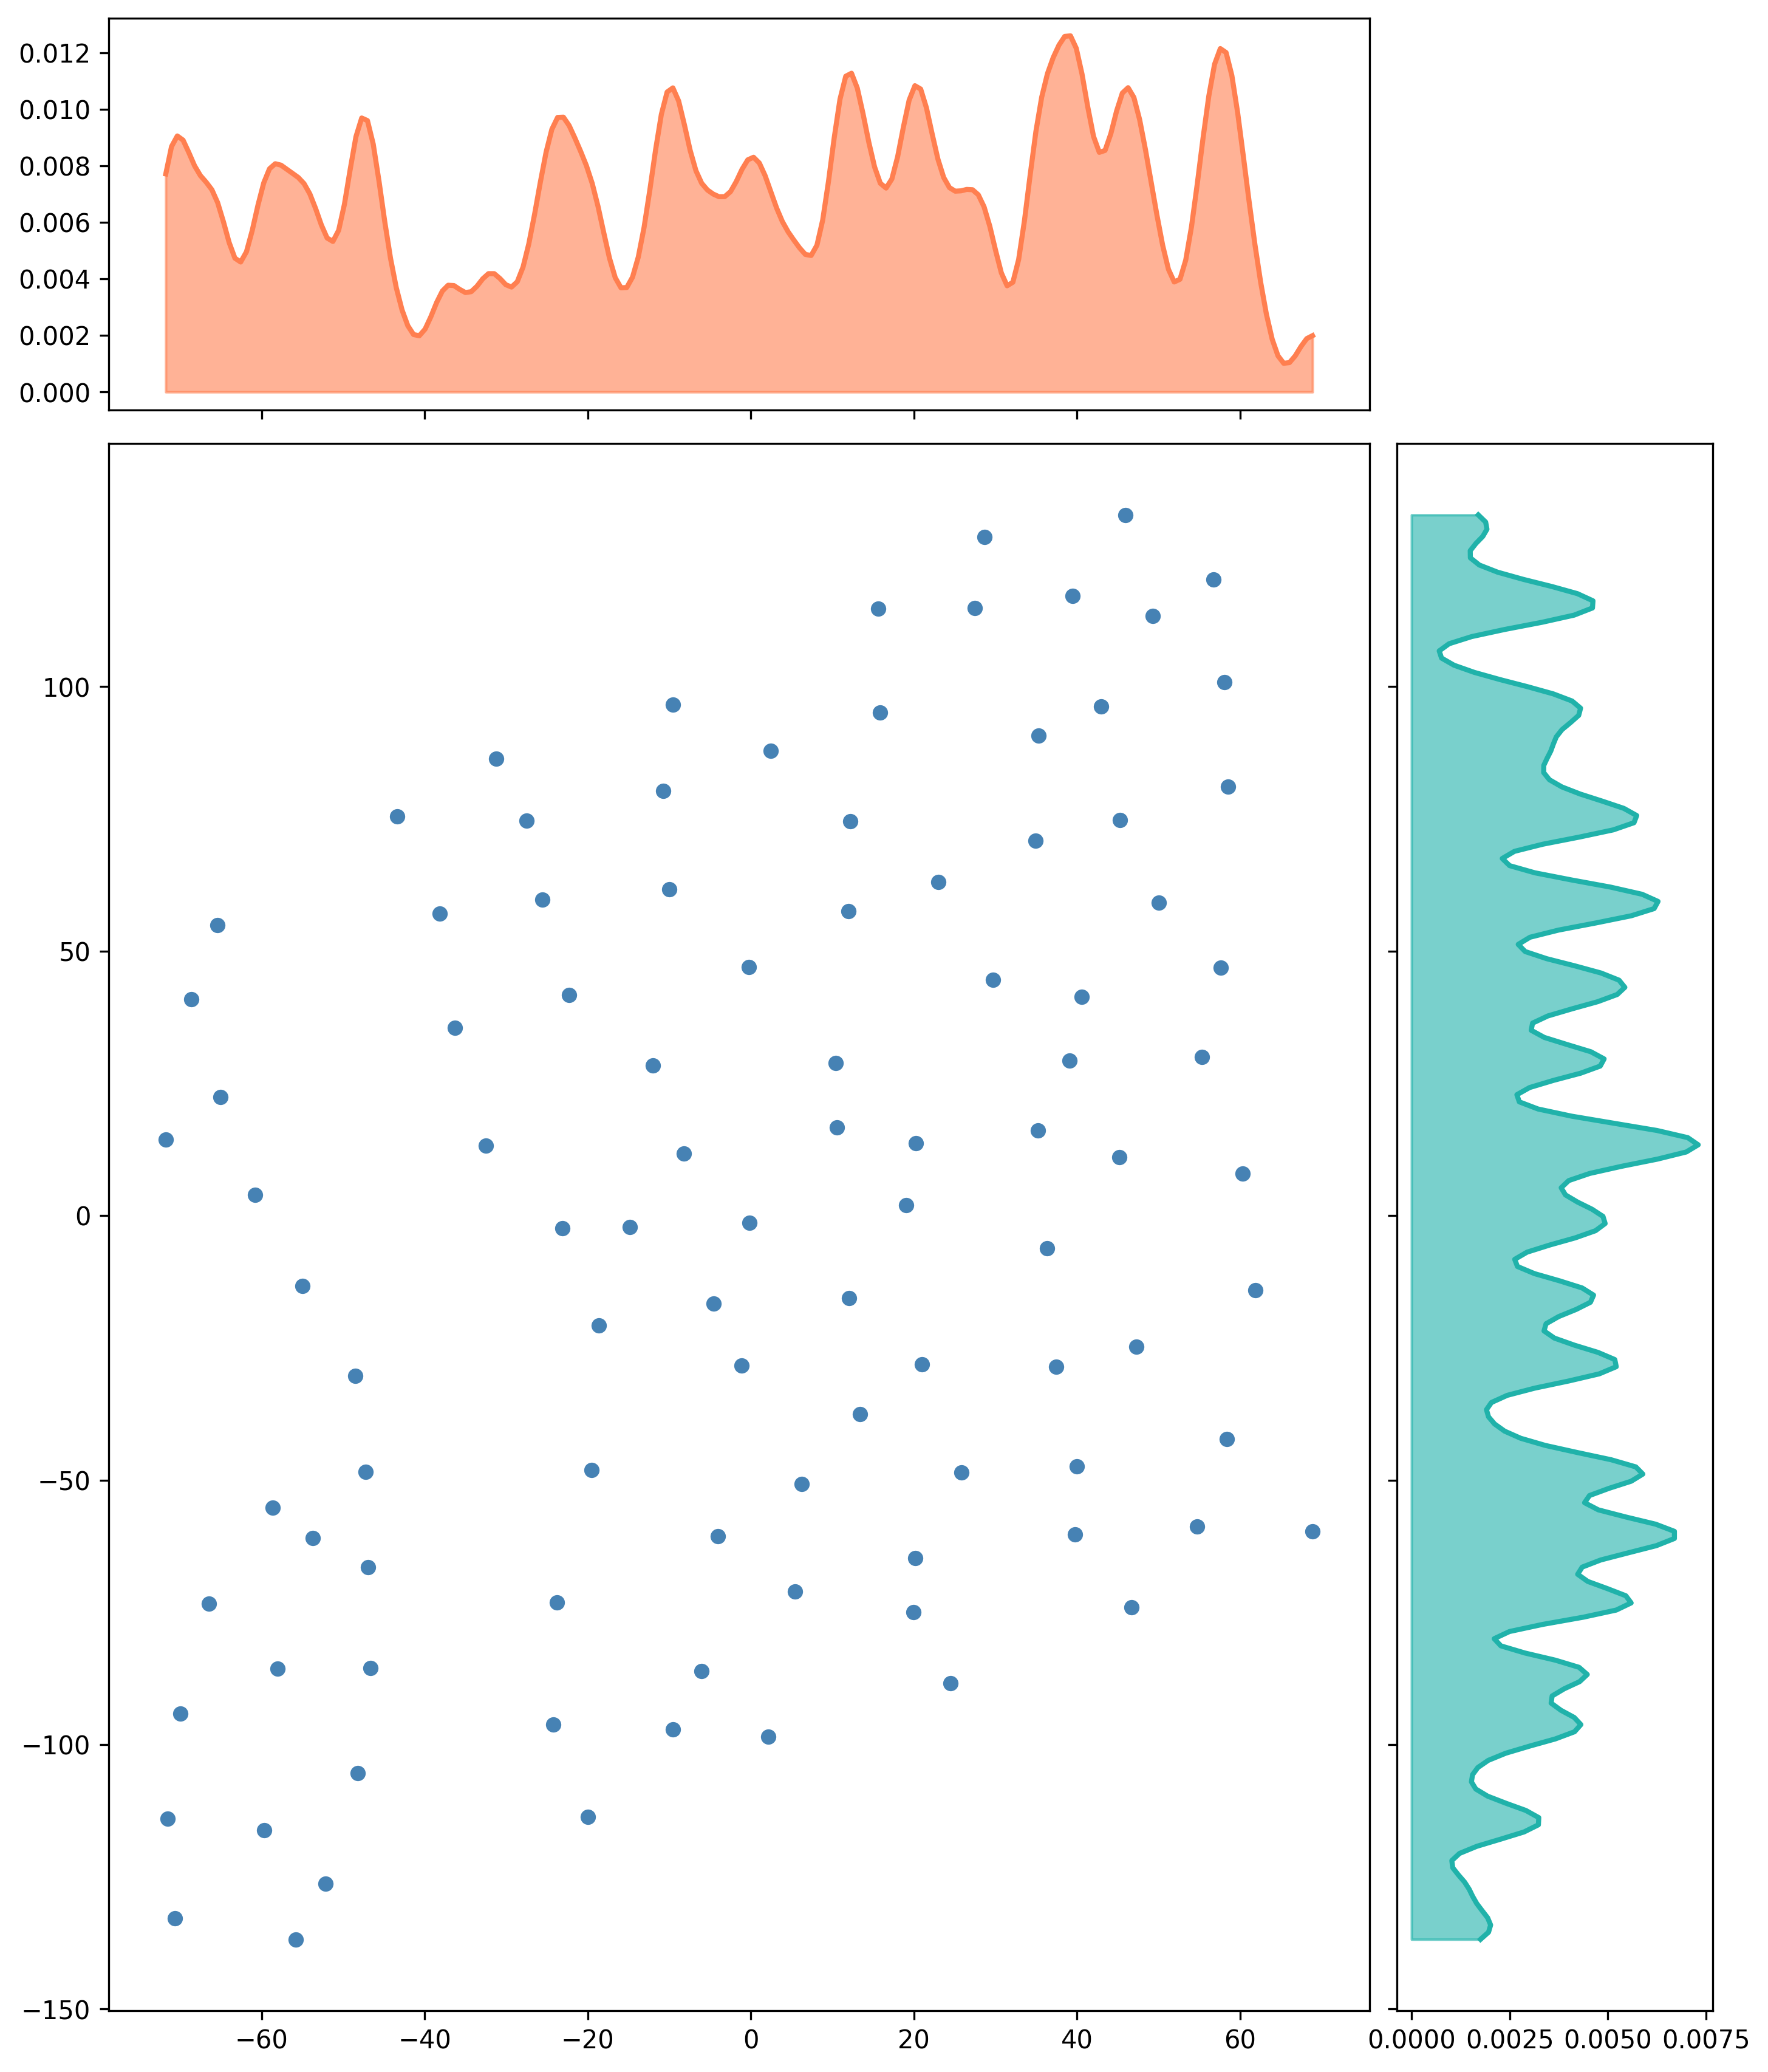

In [24]:
basis_i = np.array([cos(theta_i), sin(theta_i)])
basis_j = np.array([cos(theta_j), sin(theta_j)])

transformed_points = fg.transform_along_basis(points_centered, basis_i, basis_j)
grids_i_axes = fg.find_kde_peaks(transformed_points[:, 0], bw=0.08)[:, 0]
grids_j_axes = fg.find_kde_peaks(transformed_points[:, 1], bw=0.08)[:, 0]

# 创建图形布局
fig = plt.figure(figsize=(12, 15),dpi=300)
gs = fig.add_gridspec(3, 3, width_ratios=[4, 1, 0.2], height_ratios=[1, 4, 0.2],hspace=0.05, wspace=0.05)

# 主散点图
ax_scatter = fig.add_subplot(gs[1, 0])
# x轴KDE
ax_kde_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
# y轴KDE
ax_kde_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# 手动计算KDE
def plot_custom_kde(data, ax, orientation='horizontal', color='steelblue'):
    """手动绘制KDE图"""
    kde = stats.gaussian_kde(data,bw_method=0.05)
    x_range = np.linspace(min(data), max(data), 200)
    y_kde = kde(x_range)

    if orientation == 'horizontal':
        ax.fill_between(x_range, y_kde, alpha=0.6, color=color)
        ax.plot(x_range, y_kde, color=color, linewidth=2)
        # ax.set_ylabel('密度')
    else:
        ax.fill_betweenx(x_range, y_kde, alpha=0.6, color=color)
        ax.plot(y_kde, x_range, color=color, linewidth=2)
        # ax.set_xlabel('密度')

# 绘制散点图
ax_scatter.scatter(x=transformed_points[:,0], y=transformed_points[:,1], s=50, alpha=1, color='steelblue', edgecolor='white')
# ax_scatter.set_xlabel('X轴')
# ax_scatter.set_ylabel('Y轴')
# ax_scatter.grid(True, alpha=0.3)

# 绘制x轴KDE
plot_custom_kde(transformed_points[:,0], ax_kde_x, 'horizontal', 'coral')
ax_kde_x.tick_params(axis='x', labelbottom=False)
# ax_kde_x.set_title('X轴KDE分布', fontsize=10)

# 绘制y轴KDE
plot_custom_kde(transformed_points[:,1], ax_kde_y, 'vertical', 'lightseagreen')
ax_kde_y.tick_params(axis='y', labelleft=False)
# ax_kde_y.set_title('Y轴KDE分布', fontsize=10)


# plt.suptitle('自定义散点图与KDE分布', fontsize=14, fontweight='bold')
plt.tight_layout()




In [ ]:
basis_i = np.array([cos(theta_i), sin(theta_i)])
basis_j = np.array([cos(theta_j), sin(theta_j)])

transformed_points = fg.transform_along_basis(points_centered, basis_i, basis_j)
grids_i_axes = fg.find_kde_peaks(transformed_points[:, 0], bw=0.07)[:, 0]
grids_j_axes = fg.find_kde_peaks(transformed_points[:, 1], bw=0.07)[:, 0]

# 创建图形布局
fig = plt.figure(figsize=(12, 15),dpi=300)
gs = fig.add_gridspec(3, 3, width_ratios=[4, 1, 0.2], height_ratios=[1, 4, 0.2],hspace=0.05, wspace=0.05)

# 主散点图
ax_scatter = fig.add_subplot(gs[1, 0])
# x轴KDE
ax_kde_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
# y轴KDE
ax_kde_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# 手动计算KDE
def plot_custom_kde(data, ax, orientation='horizontal', color='steelblue'):
    """手动绘制KDE图"""
    kde = stats.gaussian_kde(data,bw_method=0.07)
    x_range = np.linspace(min(data), max(data), 200)
    y_kde = kde(x_range)

    if orientation == 'horizontal':
        ax.fill_between(x_range, y_kde, alpha=0.6, color=color)
        ax.plot(x_range, y_kde, color=color, linewidth=2)
        # ax.set_ylabel('密度')
    else:
        ax.fill_betweenx(x_range, y_kde, alpha=0.6, color=color)
        ax.plot(y_kde, x_range, color=color, linewidth=2)
        # ax.set_xlabel('密度')

# 绘制散点图
ax_scatter.scatter(x=transformed_points[:,0], y=transformed_points[:,1], s=50, alpha=1, color='steelblue', edgecolor='white')
# ax_scatter.set_xlabel('X轴')
# ax_scatter.set_ylabel('Y轴')
# ax_scatter.grid(True, alpha=0.3)

# 绘制x轴KDE
plot_custom_kde(transformed_points[:,0], ax_kde_x, 'horizontal', 'coral')
ax_kde_x.tick_params(axis='x', labelbottom=False)
# ax_kde_x.set_title('X轴KDE分布', fontsize=10)

# 绘制y轴KDE
plot_custom_kde(transformed_points[:,1], ax_kde_y, 'vertical', 'lightseagreen')
ax_kde_y.tick_params(axis='y', labelleft=False)
# ax_kde_y.set_title('Y轴KDE分布', fontsize=10)


# plt.suptitle('自定义散点图与KDE分布', fontsize=14, fontweight='bold')
plt.tight_layout()
for i_line in grids_i_axes:
    ax_scatter.axvline(i_line, color='coral', alpha=0.5, linestyle='--')
for j_line in grids_j_axes:
    ax_scatter.axhline(j_line, color='lightseagreen', alpha=0.5, linestyle='--')

plt.show()

In [ ]:
nearest_grids = fg.calculate_nearest_location(transformed_points, grids_i_axes, grids_j_axes)

plt.figure(figsize=(15, 15),dpi=300)
plt.gca().set_aspect('equal')
plt.scatter(points[:,0], points[:,1], s=10, c='steelblue', alpha=0.9)
bias_dist = 40
for i,(px,py) in enumerate(points):

    nearest_grid_idx = nearest_grids[i]
    gx,gy = nearest_grid_idx[0],nearest_grid_idx[1]

    plt.annotate(f'({gx}, {gy})',
                 xy=(px, py), 
                 xytext=(px+bias_dist, py+bias_dist),
                 arrowprops=dict(arrowstyle='->', color='darkred'),
                 fontsize=7.5,
                 zorder =3)

unique_grids_i = np.unique(nearest_grids[:, 0])
for i in unique_grids_i:

    indices = np.where(nearest_grids[:, 0] == i)[0]

    sorted_indices = np.sort(indices)
    selected_points = points[sorted_indices, :]

    plt.plot(selected_points[:,0], selected_points[:,1], c="gray", alpha=0.5, zorder=1)

unique_grids_j = np.unique(nearest_grids[:,1])

for j in unique_grids_j:
    indices = np.where(nearest_grids[:,1]==j)[0]
    sorted_indices = np.sort(indices)
    selected_points = points[sorted_indices,:]
    plt.plot(selected_points[:,0], selected_points[:,1], c="gray", alpha=0.5, zorder=1)


    